## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
print(len(gdp_df))

8219


In [10]:
print(len(gdp_df.columns))

4


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df=gdp_df.drop("Value Footnotes",axis=1)
gdp_df=gdp_df.rename(columns={"Country or Area":"Country","Year":"Year","Value":"GDP_Per_Capita"})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
   

In [14]:
print(gdp_df.Year.min())
print(gdp_df.Year.max())
print(gdp_df.Year.max()-gdp_df.Year.min()+1)


1990
2023
34


In [15]:
country_count=gdp_df["Country"].value_counts()==34

all_year_countries=country_count[country_count==True]
print("Countries with all year data :-",len(all_year_countries))

some_year_countries=country_count[country_count==False]
print("Countries with missing data :-",len(some_year_countries))


Countries with all year data :- 228
Countries with missing data :- 19


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
   

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

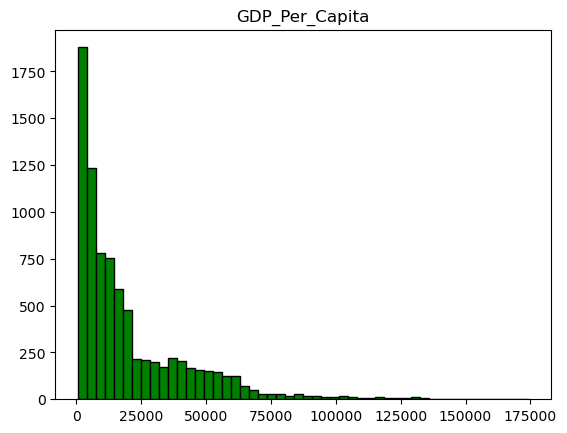

In [31]:
gdp_df.hist("GDP_Per_Capita",bins=50,edgecolor="black", grid=False, color="Green")

Text(0.5, 1.0, 'Density plot using seaborn')

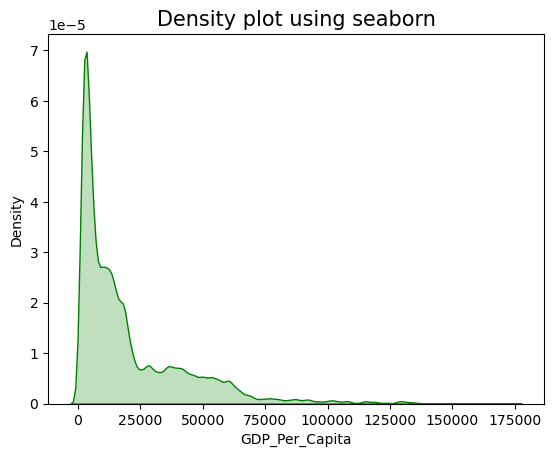

In [59]:
sns.kdeplot(gdp_df["GDP_Per_Capita"], fill=True, color="green",bw_method=0.05)
plt.title("Density plot using seaborn",fontsize=15)

Text(0.5, 1.0, 'boxplot using matplotlib')

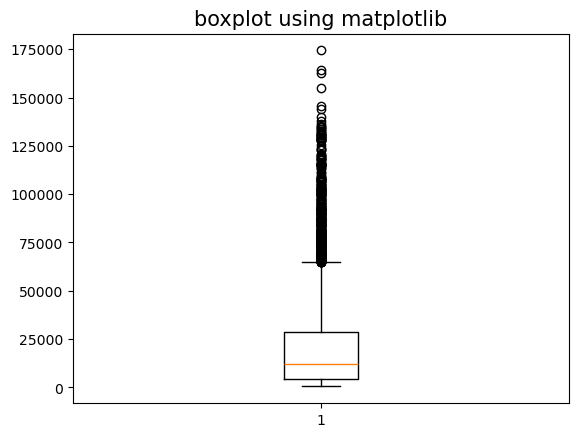

In [81]:
plt.boxplot(gdp_df["GDP_Per_Capita"])
plt.title("boxplot using matplotlib", fontsize=15)

Text(0.5, 1.0, 'Violin plot using seaborn')

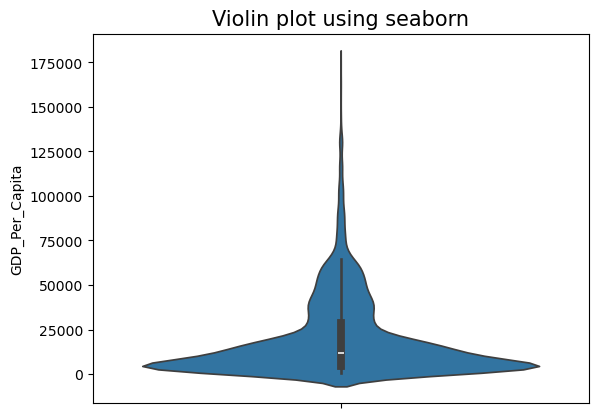

In [83]:
sns.violinplot(gdp_df["GDP_Per_Capita"])
plt.title("Violin plot using seaborn", size=15)

9. What was the median GDP per capita value in 2020?

In [116]:
gdp_2020=gdp_df[gdp_df["Year"]==2020]
gdp_2020_mean=gdp_2020["GDP_Per_Capita"].mean()
print(gdp_2020_mean)

23044.942555569738


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [169]:
gdp_1990=gdp_df[gdp_df["Year"]==1990]
gdp_2000=gdp_df[gdp_df["Year"]==2000]
gdp_2010=gdp_df[gdp_df["Year"]==2010]
gdp_2020=gdp_df[gdp_df["Year"]==2020]

gdp_1990=pd.DataFrame({ 'group' : gdp_1990["Year"], 'value': gdp_1990["GDP_Per_Capita"] })
gdp_2000=pd.DataFrame({ 'group' : gdp_2000["Year"], 'value': gdp_2000["GDP_Per_Capita"] })
gdp_2010=pd.DataFrame({ 'group' : gdp_2010["Year"], 'value': gdp_2010["GDP_Per_Capita"] })
gdp_2020=pd.DataFrame({ 'group' : gdp_2020["Year"], 'value': gdp_2020["GDP_Per_Capita"] })
gdp_decades=pd.concat([gdp_1990,gdp_2000,gdp_2010,gdp_2020])

Text(0, 0.5, 'gdp_per_capita')

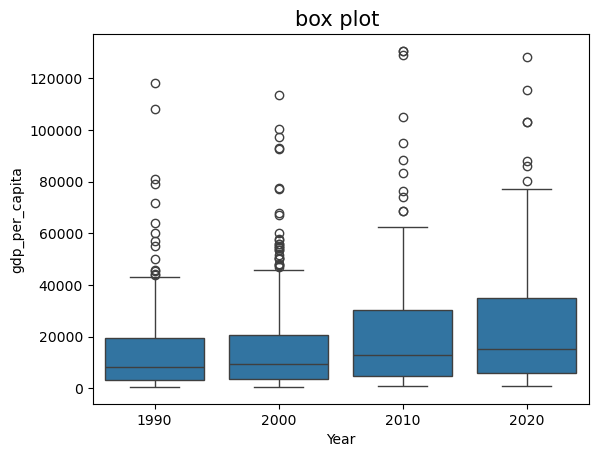

In [183]:
sns.boxplot(x="group",y="value", data=gdp_decades)
plt.title("box plot ", size = 15)
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")

Text(0, 0.5, 'gdp_per_capita')

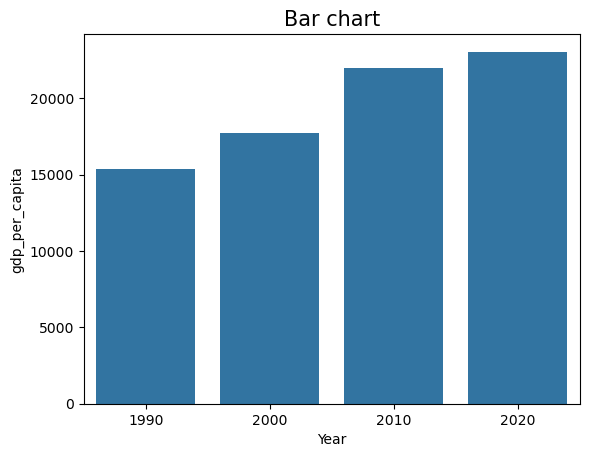

In [231]:
sns.barplot(x="group",y="value", data=gdp_decades, errorbar=("ci", 0))
plt.title("Bar chart",size=15)
plt.xlabel("Year")
plt.ylabel("gdp_per_capita")